#**Part 1: Importing, reviewing, and preparing the data set**
Every data analysis project starts with understanding the corresponding data set. Although we use the same data set as that used in the *Exploratory Data Analysis* project, we should still take a glimpse of it

In [ ]:
# Import necessary packages
import io
from google.colab import files

import numpy as np
import pandas as pd

In [ ]:
# Upload the file
uploaded = files.upload()

Saving Exploratory Data.csv to Exploratory Data.csv


In [ ]:
# Read in and take a re-glimpse of the data set
df = pd.read_csv(io.BytesIO(uploaded["Exploratory Data.csv"]))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Now let's look at some detail of the data set
# The column number and non-null number are all 110527 - implying that there are
# no NaN entries in this data set
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [ ]:
# Clean up duplicate columns - 0 implies that we have removed all the duplicates
df.drop_duplicates()
sum(df.duplicated())

0

In [ ]:
# Drop the row with Age that is less than 0 -- that is impossible!
df = df[df['Age'] >= 0]

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


(110526, 14)

#**Part 2: Logistic Regression**
Now we come to explore the relationship between the (some) personal information of a patient and whether he / she shows up in his / her appointment. Firstly, we try the logistic regression model


In [ ]:
# As we can see, PatientId and AppointmentID here are just nominal variables --
# thus we shall drop them before constructing the model

# In addition, Logistic Regression Models do not support datetime variables,
# thus we also drop ScheduleDay and AppointmentDay
# (which are also seemingly irrevelant)
df.drop(columns=['PatientId', 'AppointmentID', 
                 'ScheduledDay', 'AppointmentDay'], inplace=True)

# Use (0, 1) instead of (No, Yes) for graphing
df["No-show"].replace(('No', 'Yes'), (0, 1), inplace = True)

# Take a glimpse of the dataframe
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [ ]:
# Convert all entries except 'Age' and 'No-show' to dummy varaibles
df_converted = pd.get_dummies(df, columns=['Gender', 'Neighbourhood', 
                                         'Scholarship', 'Hipertension', 
                                         'Diabetes', 'Alcoholism', 
                                         'Handcap', 'SMS_received'])
df_converted

,Age,No-show,Gender_F,Gender_M,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,...,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Scholarship_0,Scholarship_1,Hipertension_0,Hipertension_1,Diabetes_0,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1
0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0
1,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
4,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
110523,51,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
110524,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
110525,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


In [ ]:
# Partition the data into train and test sets (70 / 30)
from sklearn.model_selection import train_test_split

X = df_converted.drop(columns='No-show')
y = df_converted['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
# Construct and fit data into our logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

model_logReg = LogisticRegression(max_iter=10)
model_logReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# See the performance of our logistic regression model on the training set
from sklearn.metrics import accuracy_score

logReg_training_pred = model_logReg.predict(X_train)
logReg_training_accuracyScore = accuracy_score(y_train, logReg_training_pred)

print("Accuracy on the training partition of our logistic regression model is",
      logReg_training_accuracyScore)

Accuracy on the training partition of our logistic regression model is 0.798068969082825


In [ ]:
# See the performance of our logistic regression model on the testing set
logReg_testing_pred = model_logReg.predict(X_test)
logReg_testing_accuracyScore = accuracy_score(y_test, logReg_testing_pred)

print("Accuracy on the testing partition of our logistic regression model is",
      logReg_testing_accuracyScore)

Accuracy on the testing partition of our logistic regression model is 0.798057783943543


[[26462     0]
 [ 6696     0]]


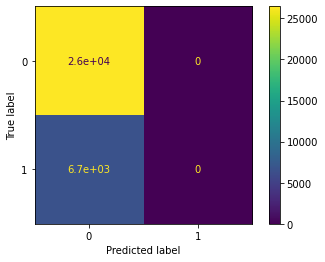

In [ ]:
# Print and visualize the confusion matrix of our logistic regression model
from sklearn import metrics

cnf_logReg = metrics.confusion_matrix(y_test, logReg_testing_pred)
print(cnf_logReg)

import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(model_logReg, X_test, y_test)
plt.show()

In [ ]:
# Calculate the parameters of our logistic regression model using cross validation
from sklearn.model_selection import cross_validate

validation_parameters_logReg = cross_validate(model_logReg, X_test, y_test, 
                                       cv=5, scoring=["f1_micro", "f1_macro"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# View the validation parameters of our logistic regression model
validation_parameters_logReg

{'fit_time': array([0.1551609 , 0.19105196, 0.20917439, 0.17437148, 0.19248629]),
 'score_time': array([0.01790071, 0.01723838, 0.01708531, 0.02350807, 0.01924038]),
 'test_f1_macro': array([0.44385744, 0.44385744, 0.4438108 , 0.44384802, 0.44384802]),
 'test_f1_micro': array([0.79810012, 0.79810012, 0.79794934, 0.79806967, 0.79806967])}

#**Part 3: Decision Trees**#
We continue come to explore the relationship between the (some) personal information of a patient and whether he / she shows up in his / her appointment. Now we try the decision trees model

In [ ]:
# Construct and fit data into our decision trees model
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

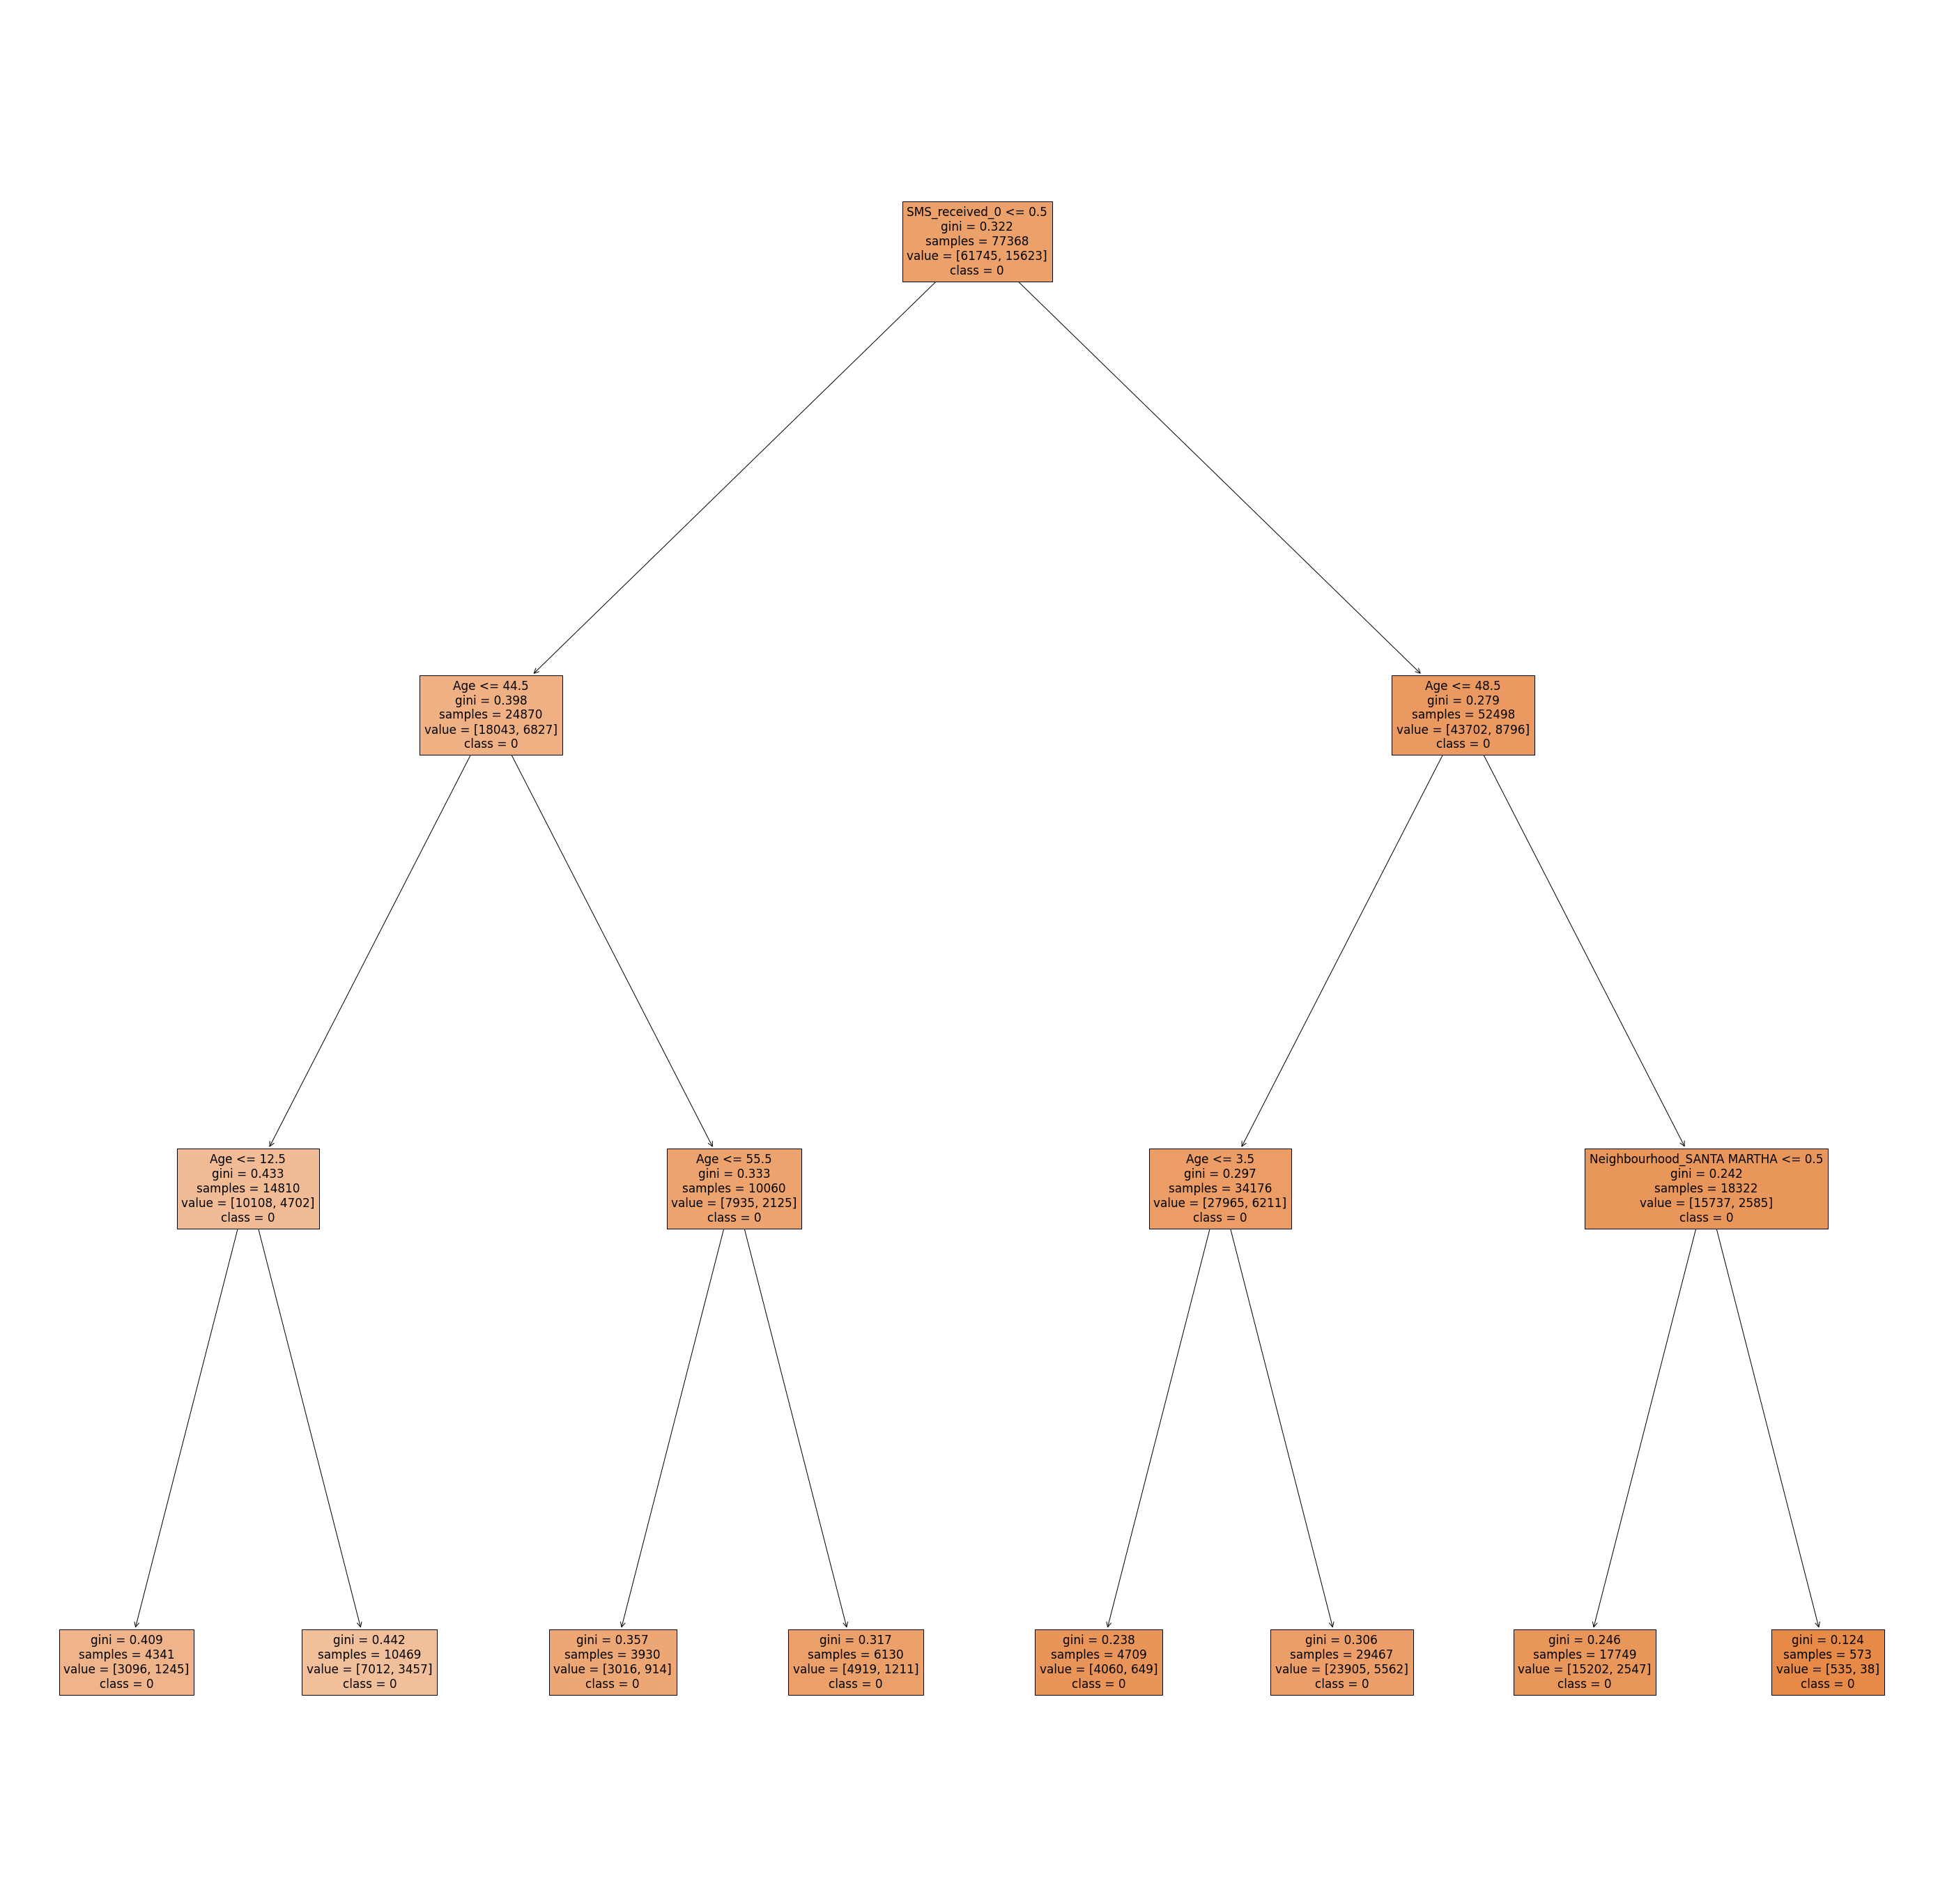

In [ ]:
# Visualize our decision trees model

from sklearn import tree

plt.figure(figsize=(50, 50))

fn = X.columns
cn = list(map(str, model_dt.classes_.tolist()))
showUpOrNotTree = tree.plot_tree(model_dt, feature_names=fn, 
                                       class_names=cn, filled=True)

plt.savefig('model_dt.png')
plt.show()

In [ ]:
# Print the top three most important features of our decision trees model
imp = pd.DataFrame(zip(X_train.columns, model_dt.feature_importances_))
imp.sort_values(by=1, ascending=False).head(3)

,0,1
97,SMS_received_0,0.637235
0,Age,0.351850
69,Neighbourhood_SANTA MARTHA,0.010915


In [ ]:
# See the performance of our decision trees model on the training set
dt_training_pred = model_dt.predict(X_train)
dt_training_accuracyScore = accuracy_score(y_train, dt_training_pred)

print("Accuracy on the training partition of our decision trees model is",
      dt_training_accuracyScore)

Accuracy on the training partition of our decision trees model is 0.798068969082825


In [ ]:
# See the performance of our decision trees model on the testing set
dt_testing_pred = model_dt.predict(X_test)
dt_testing_accuracyScore = accuracy_score(y_test, dt_testing_pred)

print("Accuracy on the testing partition of our decision trees model is",
      dt_testing_accuracyScore)

Accuracy on the testing partition of our decision trees model is 0.798057783943543


[[26462     0]
 [ 6696     0]]


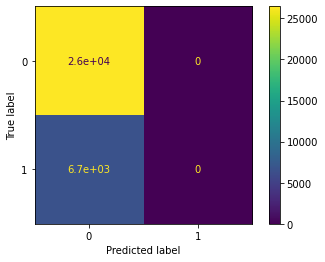

In [ ]:
# Print and visualize the confusion matrix of our decision trees model
cnf_dt = metrics.confusion_matrix(y_test, dt_testing_pred)
print(cnf_dt)

metrics.plot_confusion_matrix(model_dt, X_test, y_test)
plt.show()

In [ ]:
# Calculate the parameters of our decision trees model using cross validation
validation_parameters_dt = cross_validate(model_dt, X_test, y_test, 
                                       cv=5, scoring=["f1_micro", "f1_macro"])

In [ ]:
# View the validation parameters of our decision trees model
validation_parameters_dt

{'fit_time': array([0.07717013, 0.07728672, 0.08035088, 0.0833714 , 0.07696533]),
 'score_time': array([0.01009965, 0.01000571, 0.01508832, 0.01064157, 0.00974607]),
 'test_f1_macro': array([0.44385744, 0.44385744, 0.44362416, 0.44384802, 0.44384802]),
 'test_f1_micro': array([0.79810012, 0.79810012, 0.7973462 , 0.79806967, 0.79806967])}

#**Part 4: Bagging**#
We continue come to explore the relationship between the (some) personal information of a patient and whether he / she shows up in his / her appointment. Now we try the bagging model with DecisionTreeClassifier as its base estimator

In [ ]:
# Construct and fit data into our generic bagging model 
# with DecisionTreeClassifier as its base estimator

from sklearn.ensemble import BaggingClassifier

base_est_bagging = DecisionTreeClassifier(max_depth=3)

model_bagging = BaggingClassifier(base_est_bagging, n_estimators=10, random_state=42)
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [ ]:
# See the performance of our bagging model on the training set
bagging_training_pred = model_bagging.predict(X_train)
bagging_training_accuracyScore = accuracy_score(y_train, bagging_training_pred)

print("Accuracy on the training partition of our bagging model is",
      bagging_training_accuracyScore)

Accuracy on the training partition of our bagging model is 0.798068969082825


In [ ]:
# See the performance of our bagging model on the testing set
bagging_testing_pred = model_bagging.predict(X_test)
bagging_testing_accuracyScore = accuracy_score(y_test, bagging_testing_pred)

print("Accuracy on the testing partition of our bagging model is",
      bagging_testing_accuracyScore)

Accuracy on the testing partition of our bagging model is 0.798057783943543


[[26462     0]
 [ 6696     0]]


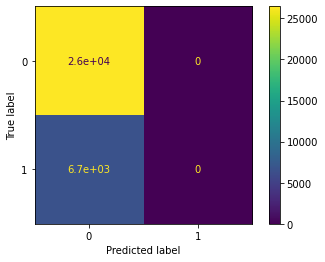

In [ ]:
# Print and visualize the confusion matrix of our bagging model
cnf_bagging = metrics.confusion_matrix(y_test, bagging_testing_pred)
print(cnf_bagging)

metrics.plot_confusion_matrix(model_bagging, X_test, y_test)
plt.show()

In [ ]:
# Calculate the parameters of our bagging model using cross validation
validation_parameters_bagging = cross_validate(model_bagging, X_test, y_test, 
                                       cv=5, scoring=["f1_micro", "f1_macro"])

In [ ]:
# View the validation parameters of our bagging model
validation_parameters_bagging

{'fit_time': array([0.52763796, 0.51480532, 0.50200415, 0.51948214, 0.50396943]),
 'score_time': array([0.03963494, 0.04468012, 0.04231596, 0.04103518, 0.04161501]),
 'test_f1_macro': array([0.44385744, 0.44385744, 0.4438108 , 0.44384802, 0.44384802]),
 'test_f1_micro': array([0.79810012, 0.79810012, 0.79794934, 0.79806967, 0.79806967])}

#**Part 5: RandomForest**#
We continue come to explore the relationship between the (some) personal information of a patient and whether he / she shows up in his / her appointment. Now we try the random forests model

In [ ]:
# Construct and fit data into our random forests model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Print the top three most important features for our random forests model
imp = pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
imp.sort_values(by=1, ascending=False).head(3)

,0,1
0,Age,0.697300
97,SMS_received_0,0.017668
98,SMS_received_1,0.016607


In [ ]:
# See the performance of our random forests model on training set
rf_training_pred = model_rf.predict(X_train)
rf_training_accuracyScore = accuracy_score(y_train, rf_training_pred)

print("Accuracy on the training partition of our random forests model is",
      rf_training_accuracyScore)

Accuracy on the training partition of our random forests model is 0.8557284665494779


In [ ]:
# See the performance of our random forests model on the testing set
rf_testing_pred = model_rf.predict(X_test)
rf_testing_accuracyScore = accuracy_score(y_test, rf_testing_pred)

print("Accuracy on the testing partition of our random forests model is",
      rf_testing_accuracyScore)

Accuracy on the testing partition of our random forests model is 0.7534531636407503


[[23926  2536]
 [ 5639  1057]]


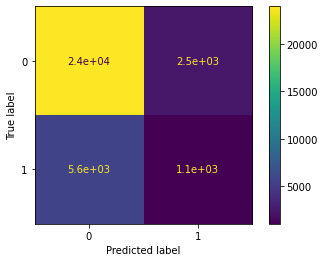

In [ ]:
# Print and visualize the confusion matrix of our random forests model
cnf_rf = metrics.confusion_matrix(y_test, rf_testing_pred)
print(cnf_rf)

metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

In [ ]:
# Calculate the parameters of our random forests model using cross validation
validation_parameters_rf = cross_validate(model_rf, X_test, y_test, 
                                       cv=5, scoring=["f1_micro", "f1_macro"])

In [ ]:
# View the validation parameters of our random forests model
validation_parameters_rf

{'fit_time': array([6.08128142, 6.06334472, 6.09251761, 6.10928011, 6.18055534]),
 'score_time': array([0.33784294, 0.35010481, 0.34569454, 0.35812998, 0.37048388]),
 'test_f1_macro': array([0.52126484, 0.53183424, 0.52392233, 0.53728315, 0.52389871]),
 'test_f1_micro': array([0.73371532, 0.74185766, 0.73462002, 0.74046147, 0.73096064])}

#**Part 6:  Boosting**#
We continue come to explore the relationship between the (some) personal information of a patient and whether he / she shows up in his / her appointment. Now we try the boosting model with DecisionTreeClassifier as its base estimator

In [ ]:
# Construct and fit data into our AdaBoost Classification model
# with DecisionTreeClassifier as its base estimator

from sklearn.ensemble import AdaBoostClassifier

base_est_AdaBoost = DecisionTreeClassifier(max_depth=3)
model_boosting = AdaBoostClassifier(base_est_AdaBoost, n_estimators=200, 
                                    random_state=42, learning_rate=0.05)
model_boosting.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# Print the top three most important features for our boosting model
imp = pd.DataFrame(zip(X_train.columns, model_boosting.feature_importances_))
imp.sort_values(by=1, ascending=False).head(3)

,0,1
0,Age,0.388575
97,SMS_received_0,0.083091
98,SMS_received_1,0.047408


In [ ]:
# See the performance of our boosting model on the training set
boosting_training_pred = model_boosting.predict(X_train)
boosting_training_accuracyScore = accuracy_score(y_train, boosting_training_pred)

print("Accuracy on the training partition of our boosting model is",
      boosting_training_accuracyScore)

Accuracy on the training partition of our boosting model is 0.7982369972081481


In [ ]:
# See the performance of our boosting model on the testing set
boosting_testing_pred = model_boosting.predict(X_test)
boosting_testing_accuracyScore = accuracy_score(y_test, boosting_testing_pred)

print("Accuracy on the testing partition of our boosting model is",
      boosting_testing_accuracyScore)

Accuracy on the testing partition of our boosting model is 0.798057783943543


[[26460     2]
 [ 6694     2]]


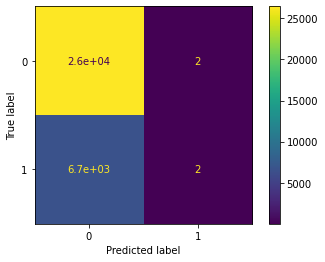

In [ ]:
# Print and visualize the confusion matrix of our boosting model
cnf_boosting = metrics.confusion_matrix(y_test, boosting_testing_pred)
print(cnf_boosting)

metrics.plot_confusion_matrix(model_boosting, X_test, y_test)
plt.show()

In [ ]:
# Calculate the parameters of our boosting model using cross validation
validation_parameters_boosting = cross_validate(model_boosting, X_test, y_test, 
                                       cv=5, scoring=["f1_micro", "f1_macro"])

In [ ]:
# View the validation parameters of our boosting model
validation_parameters_boosting

{'fit_time': array([12.90833259, 12.89648151, 12.99401951, 12.94397712, 13.11632228]),
 'score_time': array([0.60815406, 0.58182311, 0.57622051, 0.56064367, 0.59400153]),
 'test_f1_macro': array([0.44489769, 0.44674044, 0.44339068, 0.44527061, 0.44347461]),
 'test_f1_micro': array([0.79674306, 0.79794934, 0.79659228, 0.79791887, 0.79686322])}

#**Part 7: Selecting and improving the best model**#
After trying several types of model, now we shall come back to pick and improve the best one by fine tuning its parameters

In [ ]:
# Find and print our best model among all those constructed above
models_accuracies = np.array([logReg_testing_accuracyScore,
                  dt_testing_accuracyScore,
                  bagging_testing_accuracyScore,
                  rf_testing_accuracyScore,
                  boosting_testing_accuracyScore])

if max(models_accuracies) == models_accuracies[0]:
  print("The best model is logistic regression")
elif max(models_accuracies) == models_accuracies[1]:
  print("The best model is decision trees")
elif max(models_accuracies) == models_accuracies[2]:
  print("The best model is bagging")
elif max(models_accuracies) == models_accuracies[3]:
  print("The best model is random forests")
else:
  print("The best model is boosting")

The best model is logistic regression


In [ ]:
# Prepare parameters to fine tune our best model (logistic regression)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

LRparam_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'none'],
    'max_iter': list(range(0, 10, 1)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [ ]:
# Fine tune the best model (logistic regression)
model_logReg_fineTuned = GridSearchCV(estimator=model_logReg, param_grid=LRparam_grid, 
                                    refit=True, verbose=3, cv=5)

model_logReg_fineTuned.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] C=0.1, max_iter=0, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=0, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=newton-cg .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=0, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=newton-cg .................
[CV]  C=0.1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=0, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=0, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=0, penalty=l2, solver=liblinear .................
[CV]  C=0.1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] C=0.1, max_iter=0, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=liblinear .................
[CV]  C=0.1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=newton-cg ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=newton-cg ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=newton-cg ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

[CV]  C=0.1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=0, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=0, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=0, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=0, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=0, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=0, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=1, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=1, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=1, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=2, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=l1, solver=liblinear .................
[CV]  C=0.1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=2, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=2, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=2, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=2, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=3, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=3, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=l1, solver=liblinear .................
[CV]  C=0.1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=3, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=3, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=3, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=3, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=3, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=3, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=3, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=3, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=3, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=3, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=3, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=3, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=3, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=3, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=4, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=4, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=4, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=4, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=4, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=4, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=4, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=0.1, max_iter=4, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=4, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=4, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=5, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=5, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=5, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=5, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=5, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=5, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=5, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=5, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=5, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=5, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=5, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=5, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=5, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=5, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=0.1, max_iter=5, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=5, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=5, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=5, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=5, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=5, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=6, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=6, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=6, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=6, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=6, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=0.1, max_iter=6, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=0.1, max_iter=6, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=6, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=6, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=6, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=6, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=7, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=7, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=7, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=7, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=7, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.8s
[CV] C=0.1, max_iter=7, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=7, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=0.1, max_iter=7, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=7, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=7, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=8, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=8, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=8, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=8, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=8, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=8, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=8, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=8, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=8, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=8, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=8, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=9, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=9, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=l1, solver=newton-cg .................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=l1, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=9, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.1, max_iter=9, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=l1, solver=lbfgs .....................
[CV]  C=0.1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=9, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=9, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=9, penalty=l1, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=9, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=9, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=0.1, max_iter=9, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=l2, solver=liblinear .................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=0.1, max_iter=9, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=newton-cg ...............


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=none, solver=lbfgs ...................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=0.1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=0.1, max_iter=9, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=0.1, max_iter=9, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.1, max_iter=9, penalty=none, solver=liblinear ...............
[CV]  C=0.1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, max_iter=0, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=0, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=l1, solver=liblinear ...................
[CV]  C=1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l1, solver=liblinear ...................
[CV]  C=1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=newton-cg ...................
[CV]  C=1, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=newton-cg .................
[CV]  C=1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=newton-cg .................
[CV]  C=1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=newton-cg .................
[CV]  C=1, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=1, max_iter=0, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=0, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=0, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=1, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=1, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=1, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=1, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=1, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=1, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=1, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=1, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, max_iter=1, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, max_iter=2, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=2, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=2, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=2, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=2, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=2, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=l1, solver=liblinear ...................
[CV]  C=1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=2, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=1, max_iter=2, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=2, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=2, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=l1, solver=liblinear ...................
[CV]  C=1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=3, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=3, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=3, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=3, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=3, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=3, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=3, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, max_iter=3, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=l1, solver=liblinear ...................
[CV]  C=1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=4, penalty=l1, solver=liblinear ...................

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=4, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=4, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=4, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=4, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=1, max_iter=4, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=4, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=4, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=4, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=5, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=5, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=5, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=5, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=5, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=5, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=5, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=5, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=5, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=5, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=5, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=5, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=5, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=1, max_iter=5, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=5, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=5, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=5, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=6, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=6, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=1, max_iter=6, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=6, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=1, max_iter=6, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=6, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=6, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, max_iter=7, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=7, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=7, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=7, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=l1, solver=liblinear ...................
[CV]  C=1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=7, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=7, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=7, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=7, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=8, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=8, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=8, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=8, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=1, max_iter=8, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=8, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=8, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=8, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=8, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, max_iter=9, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=9, penalty=l1, solver=newton-cg ...................
[CV]  C=1, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=l1, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=9, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=9, penalty=l1, solver=lbfgs .......................
[CV]  C=1, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=9, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=9, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=9, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=9, penalty=l1, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=1, max_iter=9, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=l2, solver=newton-cg ...................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=1, max_iter=9, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=1, max_iter=9, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=lbfgs .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=l2, solver=liblinear ...................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=1, max_iter=9, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=none, solver=newton-cg .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=1, max_iter=9, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=1, max_iter=9, penalty=none, solver=lbfgs .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=1, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=1, max_iter=9, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=1, max_iter=9, penalty=none, solver=liblinear .................
[CV]  C=1, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_it

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=0, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=0, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=0, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=0, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=0, penalty=l1, solver=liblinear ..................
[CV]  C=10, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=newton-cg ..................
[CV]  C=10, max_iter=0, penalty=l2, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=0, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=newton-cg ................
[CV]  C=10, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=newton-cg ................
[CV]  C=10, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=newton-cg ................
[CV]  C=10, max_iter=0, penalty=none, solver=newton-cg, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

[CV]  C=10, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.2s
[CV] C=10, max_iter=0, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=0, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=0, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=0, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=0, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=0, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=1, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=1, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=1, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=l1, solver=liblinear ..................
[CV]  C=10, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=1, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=1, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=newton-cg, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=1, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=1, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=1, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=1, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=2, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=2, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=2, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=2, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=2, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=newton-cg, score=0.798, total=   0.4s
[CV] C=10, max_iter=2, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=2, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=2, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=2, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=2, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=3, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=3, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=3, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=3, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=3, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=3, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=3, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=3, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=3, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=3, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=3, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=3, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=3, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=3, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=3, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=4, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=4, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=4, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=4, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=4, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=4, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=4, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=4, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=4, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=4, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=4, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=4, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=4, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=4, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.5s
[CV] C=10, max_iter=4, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=4, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=4, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=4, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=4, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=4, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=4, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=5, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=5, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.2s
[CV] C=10, max_iter=5, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=5, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=5, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.6s
[CV] C=10, max_iter=5, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=5, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.3s
[CV] C=10, max_iter=5, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=5, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=5, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=5, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=5, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=6, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=6, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=6, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=6, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=6, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.8s
[CV] C=10, max_iter=6, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=6, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=6, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.8s
[CV] C=10, max_iter=6, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.7s
[CV] C=10, max_iter=6, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=newton-cg, score=0.798, total=   0.8s
[CV] C=10, max_iter=6, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=6, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=6, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=6, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=6, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=7, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=7, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=7, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=7, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=7, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=7, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=newton-cg, score=0.798, total=   0.9s
[CV] C=10, max_iter=7, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=7, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=7, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=7, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=7, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=8, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=8, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=8, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=8, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=8, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=8, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=8, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=8, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=8, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=8, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=10, max_iter=8, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=8, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=8, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=newton-cg, score=0.798, total=   1.0s
[CV] C=10, max_iter=8, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=8, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=8, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=8, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=8, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=9, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=9, penalty=l1, solver=newton-cg ..................
[CV]  C=10, max_iter=9, penalty=l1, solver=newton-cg, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=l1, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=9, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=9, penalty=l1, solver=lbfgs ......................
[CV]  C=10, max_iter=9, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=9, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=9, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=9, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=9, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=9, penalty=l1, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l1, solver=liblinear, score=0.798, total=   0.3s
[CV] C=10, max_iter=9, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=l2, solver=newton-cg ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=10, max_iter=9, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=10, max_iter=9, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=l2, solver=lbfgs ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=9, penalty=l2, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=10, max_iter=9, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=10, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=l2, solver=liblinear ..................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=l2, solver=liblinear, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.1s
[CV] C=10, max_iter=9, penalty=none, solver=newton-cg ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=newton-cg, score=0.798, total=   1.2s
[CV] C=10, max_iter=9, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.5s
[CV] C=10, max_iter=9, penalty=none, solver=lbfgs ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)


[CV]  C=10, max_iter=9, penalty=none, solver=lbfgs, score=0.798, total=   0.4s
[CV] C=10, max_iter=9, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.1s
[CV] C=10, max_iter=9, penalty=none, solver=liblinear ................
[CV]  C=10, max_iter=9, penalty=none, solver=liblinear, score=nan, total=   0.0s


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:  6.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10],
                         'max_iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbos

In [ ]:
# See the performance of our fine-tuned logistic regression model on the training set
logReg_fineTuned_training_pred = model_logReg_fineTuned.predict(X_train)
logReg_fineTuned_training_accuracyScore = accuracy_score(y_train, logReg_fineTuned_training_pred)

print("Accuracy on the training partition of our fine-tuned logistic regression model is",
      logReg_fineTuned_training_accuracyScore)

Accuracy on the training partition of our fine-tuned logistic regression model is 0.7981077448040533


In [ ]:
# See the performance of our fine-tuned logistic regression model on the testing set
logReg_fineTuned_testing_pred = model_logReg_fineTuned.predict(X_test)
logReg_fineTuned_testing_accuracyScore = accuracy_score(y_test, logReg_fineTuned_testing_pred)

print("Accuracy on the training partition of our fine-tuned logistic regression model is",
      logReg_fineTuned_testing_accuracyScore)

Accuracy on the training partition of our fine-tuned logistic regression model is 0.798057783943543


In [ ]:
# Compare the the performance of the fine tuned logistic regression model
# with that of the original one
if logReg_training_accuracyScore > logReg_fineTuned_training_accuracyScore:
  print("After being fine tuned, the logistic regression model performs worse on the training set")
elif logReg_training_accuracyScore == logReg_fineTuned_training_accuracyScore:
  print("After being fine tuned, the logistic regression model performs the same on the training set")
else:
  print("After being fine tuned, the logistic regression model performs better on the training set")

if logReg_testing_accuracyScore > logReg_fineTuned_testing_accuracyScore:
  print("After being fine tuned, the logistic regression model performs worse on the testing set")
elif logReg_testing_accuracyScore == logReg_fineTuned_testing_accuracyScore:
  print("After being fine tuned, the logistic regression model performs the same on the testing set")
else:
  print("After being fine tuned, the logistic regression model performs better on the testing set")

After being fine tuned, the logistic regression model performs better on the training set
After being fine tuned, the logistic regression model performs the same on the testing set


[[26460     2]
 [ 6694     2]]


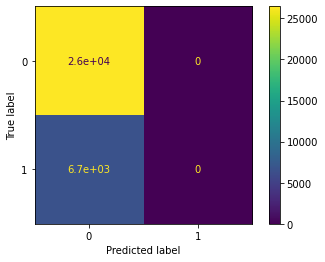

In [ ]:
# Print and visualize the confusion matrix of our fine tuned logistic regression model
cnf_logReg_fineTuned = metrics.confusion_matrix(y_test, logReg_fineTuned_testing_pred)
print(cnf_boosting)

metrics.plot_confusion_matrix(model_logReg_fineTuned, X_test, y_test)
plt.show()

In [ ]:
# see the fine tuned model's best parameters
model_logReg_fineTuned.best_params_

{'C': 10, 'max_iter': 3, 'penalty': 'l1', 'solver': 'liblinear'}